In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 2: Dynamical Systems

Part 1)

$$
g(k) = s f(k) + (1 - \delta) k
$$

Assume $g$ has a fixed point, ie. $g(k^*) = k^*$

Take $k < k^*$

As $f$ is increasing and $0 \leq \delta \leq 1$, $g$ is also increasing

Also, $g(k) < g(k^*) = k^*$ and $g^t(k) < g^t(k^*) = k^*$, so $g$ is bounded

As the sequence $g^t(k)$ is increasing and bounded, $g$ is globally stable

Part 2)

The unique fixed point is given by

$$
k^* = \frac{s f(k^*)}{\delta}
$$

This equation shows that $k^*$ is increasing in $s$ and decreasing in $\delta$

Part 3)

In [2]:
A = 5
α = 1/3
δ = 0.8
s = 0.2
f = lambda k: A * k**α
g = lambda k, s, δ: s * f(k) + (1 - δ) * k
k_grid = np.linspace(0, 8, 200)

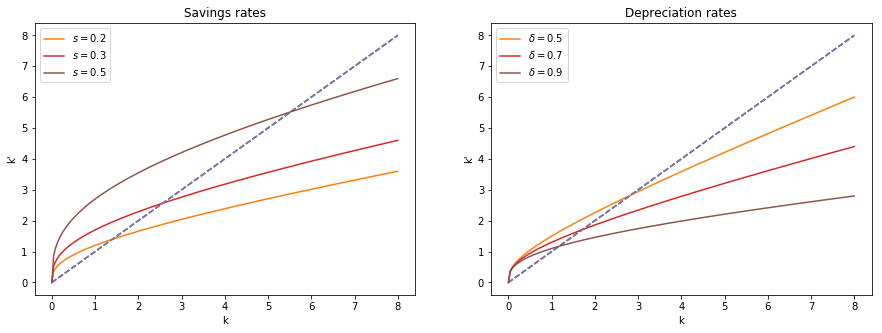

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for s_i in [0.2, 0.3, 0.5]:
    axes[0].plot(k_grid, k_grid, '--')
    axes[0].plot(k_grid, g(k_grid, s_i, δ), label=f'$s = {s_i}$')
    axes[0].set(xlabel='k', ylabel='k\'', title='Savings rates')
    axes[0].legend()
    
for δ_i in [0.5, 0.7, 0.9]:
    axes[1].plot(k_grid, k_grid, '--')
    axes[1].plot(k_grid, g(k_grid, s, δ_i), label=f'$\delta = {δ_i}$')
    axes[1].set(xlabel='k', ylabel='k\'', title='Depreciation rates')
    axes[1].legend()
    
plt.show()

## Problem 3

Part 4)

In [4]:
# Transition matrix
π = np.array([[0.5, 0.3, 0.2],
              [0.2, 0.6, 0.2],
              [0.05, 0.1, 0.85]])

In [5]:
# Generate sequence of states

def simulate(π, T=1000, n=3):
    ψ = np.empty(T, dtype=int)
    ψ[0] = np.random.choice(n)  # Initial state is uniform dist
    for t in range(1, T):
        ψ[t] = np.random.choice(3, p=π[ψ[t-1], :])
    return ψ

In [6]:
def find_dist(ψ, n=3):
    
    states = range(n)
    T = len(ψ)
    dist = np.empty((len(states)))
    
    for i, s in enumerate(states):
        dist[i] = len(ψ[ψ == s])
        
    return dist / T

The stationary distribution is...

In [7]:
long_sim = simulate(π, T=100000)
statationary_dist = find_dist(long_sim)
statationary_dist

array([0.16515, 0.27167, 0.56318])

In [8]:
T = 1000
short_sim = simulate(π, T)

In [9]:
# Find distribution over time

dist = np.empty((T, len(π_0)))
dist[0] = π_0
for t in range(1, T):
    dist[t, :] = find_dist(short_sim[:t])

NameError: name 'π_0' is not defined

In [ ]:
plt.figure(figsize=(10, 6))
plt.hlines(statationary_dist, np.zeros(3), 
           T * np.ones(3), alpha=0.5, linestyle='--')
plt.plot(dist, alpha=0.7)
plt.legend(range(3), title='State')
plt.xlabel('T')
plt.show()